# Función por optimizar

$\sum_{k=0}^{np}\sum_{k<j} \frac{1}{\lVert x_{k}-x_{j} \rVert ^{-1}} $

In [77]:
# Función por optimizar

import numpy as np

def f_electron(x, puntoInicial = np.array([1,0,0])):
    # x es un vector columna de dimensi ́on 3 ∗ np. (np.array)
    # El punto #, k, xk que quiere colocarse en la esfera,
    # tiene coordenadas (x3∗k, x3k+1, x3∗k+2).
    # Return:
    # f−x valor de la funci ́on a minimizar.
    nproton = len(x)//3 + 1
    x = np.array(x)
    puntoInicial = np.array(puntoInicial)
    x = np.concatenate((puntoInicial, x))
    x = np.reshape(x, (nproton, 3))
    resultado = 0
    for i in range(nproton):
        for j in range(nproton):
            if i < j:
                resultado += 1/np.linalg.norm(x[i]-x[j])
                
    return resultado

def h_esfera(x):
    # versi ́on para usar en programaci ́on cuadr ́atica sucesiva
    # con b ́usqueda de l ́ınea.
    # x es un vector columna de dimensi ́on 3 ∗ np.
    # El punto #, k, xk que quiere colocarse en la esfera,
    # tiene coordenadas (x[3 ∗ k], x[3k + 1], x[3 ∗ k + 2]).
    # Return h−x .
    # h−x es el vector de dimensi ́on np que indica
    # si el punto xk est ́a cerca o no de la esfera.
    # h−x[k] = x[3 ∗ k] ∗ ∗(2) + x[3k + 1] ∗ ∗(2) + x[3 ∗ k + 2] ∗ ∗(2) − 1
    #
    x = np.array(x)
    nproton = len(x)//3 
    x = np.reshape(x, (nproton, 3))
    
    return np.linalg.norm(x, axis = 1)**2 - 1
    


In [92]:
# Usamos el módulo scipy.optimize para minimizar la función f_electron
from scipy.optimize import minimize
from scipy.optimize import approx_fprime

nprotonLibres = 20
np.random.seed(191654)
x0 = np.random.rand(3*nprotonLibres)

resultado = minimize(f_electron, x0, method='SLSQP',constraints={'type':'eq', 'fun': h_esfera}, options={'maxiter':400, 'ftol':1e-10})
resultado

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 167.64162239923274
       x: [ 7.136e-01  5.846e-01 ...  6.766e-01 -6.759e-03]
     nit: 114
     jac: [-5.705e+00 -4.674e+00 ... -5.414e+00  5.408e-02]
    nfev: 7038
    njev: 114

In [93]:
np.linalg.norm(h_esfera(resultado.x))

1.7379860831815912e-11

# Gráfica de los resultados


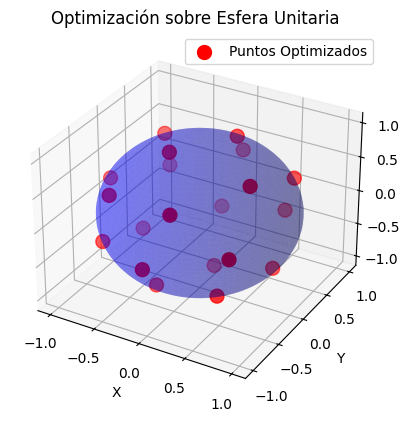

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
matplotlib.use('module://ipykernel.pylab.backend_inline')
# Extraer las coordenadas del resultado
points = resultado.x.reshape(-1, 3)

# Crear una figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Dibujar los puntos resultantes
ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='red', s=100, label='Puntos Optimizados')

# Dibujar la esfera unitaria
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color='b', alpha=0.3)

# Configuración del gráfico
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Optimización sobre Esfera Unitaria')
ax.legend()

# Mostrar el gráfico
plt.show()
